<a href="https://colab.research.google.com/github/shapi88/tensorflow_book/blob/main/02_neural_network_classification_in_tensorflow_video_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:

* Binary classification
* Mutliclass classification
* Multilabel classification

See full course materials on GitHub: https://github.com/mrdbourke/tensorflow-deep-learning/



📖 **In machine learning**, classification is a common task where the goal is to assign input data points to predefined categories or classes. There are several types of classification problems in ML, including:

* **Binary Classification:** In binary classification, the problem involves classifying instances into one of two classes or categories. For example, determining whether an email is spam or not spam.

* **Multiclass Classification:** Multiclass classification refers to problems where there are more than two classes or categories to predict. Each data point is assigned to one and only one class. An example is classifying images of fruits into categories like apple, orange, or banana.

* **Multilabel Classification:** In multilabel classification, each instance can be assigned to multiple classes simultaneously. The task involves predicting a set of labels or categories that are relevant to a given input. For instance, classifying documents into multiple topics or assigning multiple tags to an image.

* **Imbalanced Classification:** Imbalanced classification problems occur when the classes in the dataset have significantly different numbers of instances. Typically, one class is a minority class, while the other(s) are majority classes. This poses challenges, as models tend to be biased towards the majority class. Examples include fraud detection or rare disease diagnosis.

* **Hierarchical Classification:** Hierarchical classification deals with organizing classes into a hierarchical structure or taxonomy. It involves predicting the most specific class at each level of the hierarchy. For instance, classifying documents into a hierarchy of topics, such as Science -> Biology -> Genetics.

* **Ordinal Classification:** Ordinal classification handles situations where the classes have a specific order or rank. The task is to predict the relative order of the classes for each instance. An example is predicting customer satisfaction levels (e.g., low, medium, high) based on feedback.

* **Anomaly Detection:** While not strictly a classification problem, anomaly detection involves identifying rare or unusual instances that do not conform to the expected patterns. It can be seen as a binary classification task, where the goal is to distinguish normal instances from anomalous ones.

These are some common types of classification problems in machine learning. Each type has its own characteristics and specific techniques can be applied to address the challenges associated with each problem type.

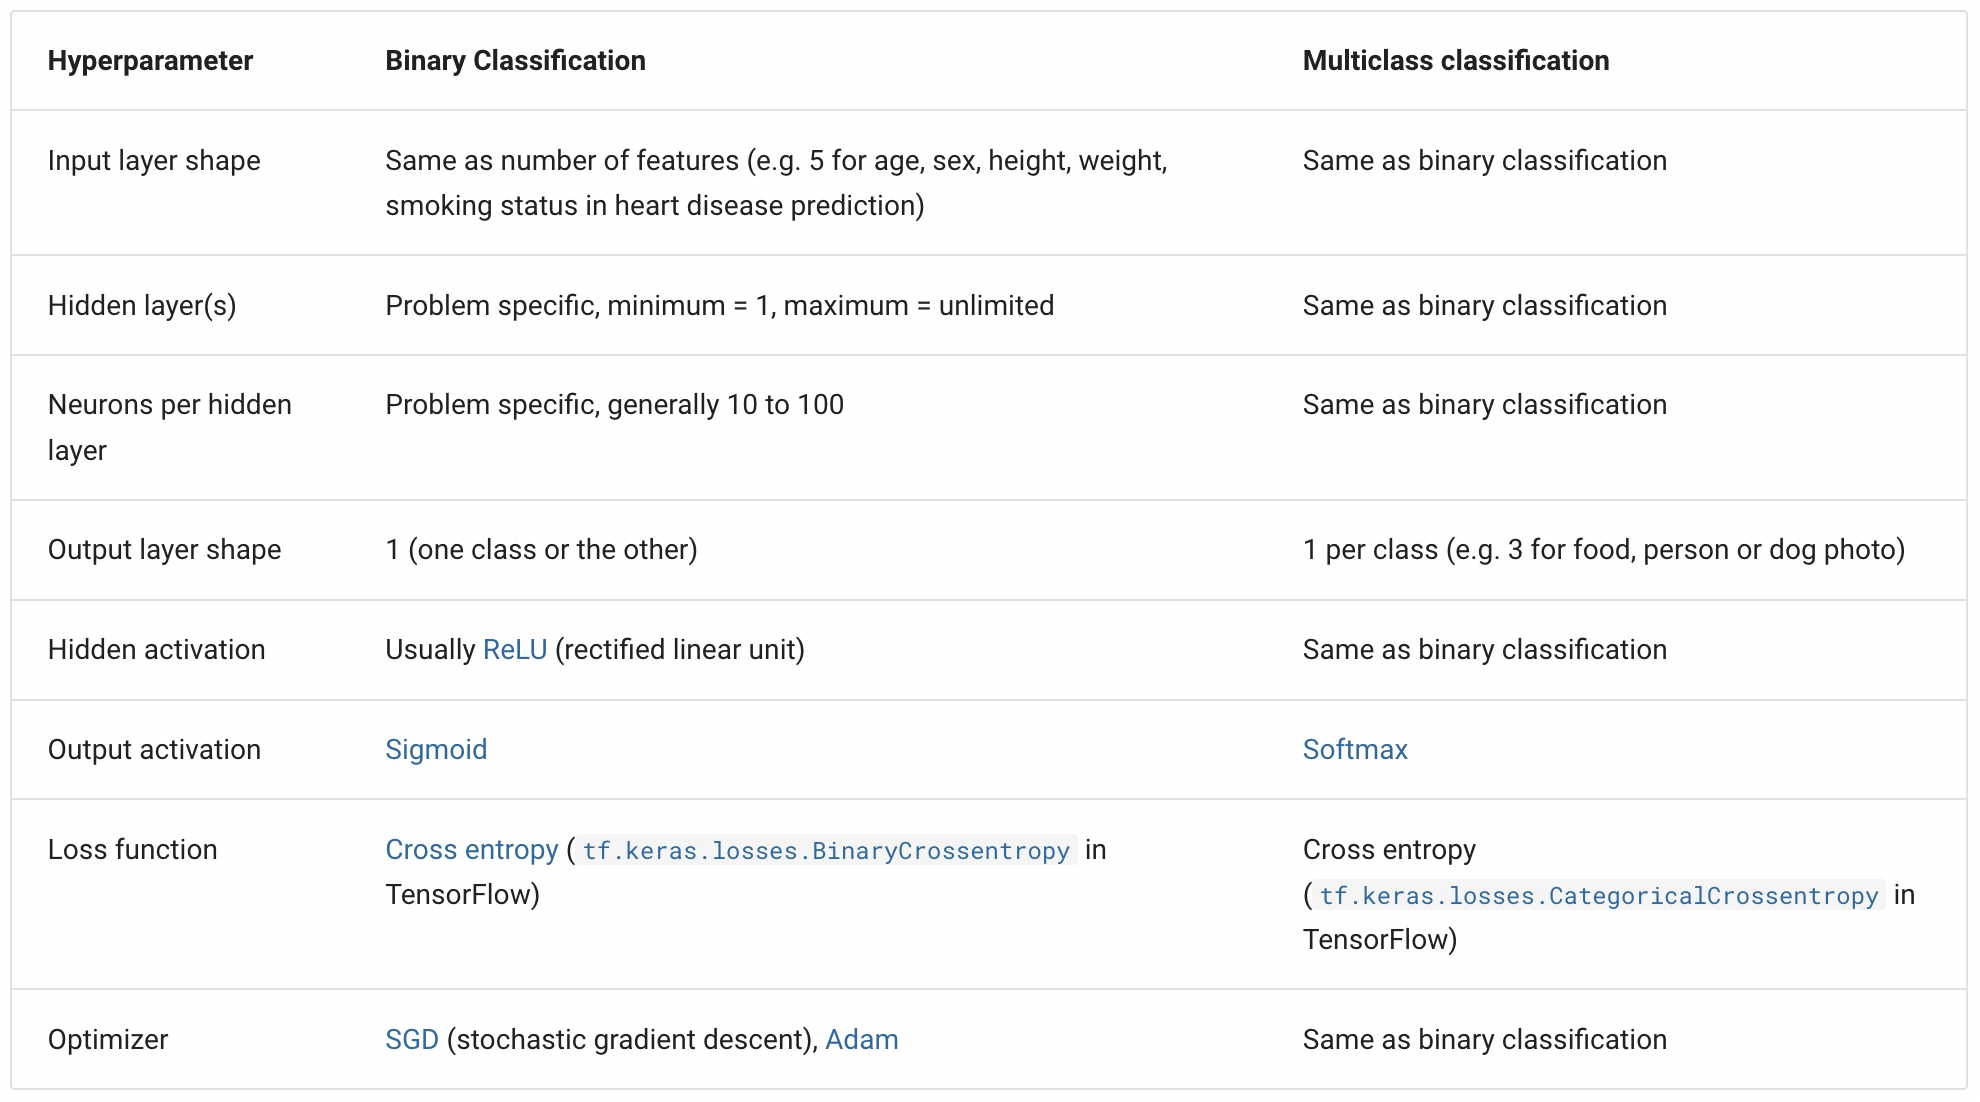

```[python]
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Prepare the data
data = pd.read_csv('data.csv')  # Replace 'data.csv' with your dataset file
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
predictions = model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
```

1. First, the data is loaded from a CSV file using pd.read_csv() function. Make sure to replace 'data.csv' with the actual file name and path of your dataset.

2. The features and target variable are separated into X and y respectively.

3. The data is split into training and testing sets using train_test_split() function from scikit-learn. Here, 80% of the data is used for training (X_train, y_train), and 20% is used for testing (X_test, y_test).

4. A Random Forest Classifier is chosen as the classification model. You can choose any other classifier depending on your task.

5. The model is trained on the training data using the fit() method.

6. Predictions are made on the test data using the predict() method.

7. The accuracy of the model is calculated by comparing the predicted labels with the actual labels using accuracy_score().

8. Finally, the accuracy is printed to the console.




# Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
#check features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [4]:
#check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
import pandas as pd

circles = pd.DataFrame({'X0': X[:, 0], "X1": X[:, 1], "Label": y})
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


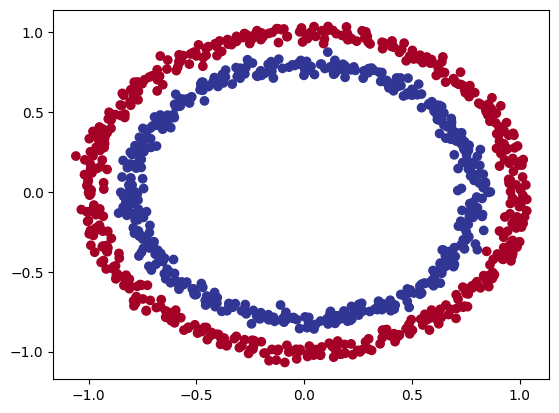

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

🛠 **Exercise**: Before pushing forward, spend 10-minutes playing around with *playground.tensorflow.org* building and running different neural networks. See what happens when you change different hyperparameters.

## Input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling 
The steps in modelling with TensorFlow are typically:

Create or import a model
Compile the model
Fit the model
Evaluate the model
Tweak
Evaluate...

In [10]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.12.0'

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                              
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.7084 - accuracy: 0.4860
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.8758 - accuracy: 0.4820
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 3.9201 - accuracy: 0.4730
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.9619 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7198 - accuracy: 0.4920


In [12]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)                                                             
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [14]:

# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932234168052673, 0.5]

In [15]:
circles["Label"].value_counts()

1    500
0    500
Name: Label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

Create a model - we might to add more layers or increase the number of hidden units within a layer.
Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [47]:
# Set random seed
tf.random.set_seed(42)
 
# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  ## Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons
 
  ## After TensorFlow 2.7.0
  tf.keras.layers.Dense(100, input_shape=(None, 1)), # <- define input_shape here
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])
 
# 2. Compile the model
history = model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

model_3.evaluate(X, y)

32/32 [==============================] - 1s 9ms/step - loss: 4.6470 - accuracy: 0.5000


[4.647028923034668, 0.5]

In [17]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7005 - accuracy: 0.5100


[0.7004669904708862, 0.5099999904632568]

In [42]:
tf.random.set_seed(42)

# 1. create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. compile the model
model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. fit the model
history = model_4.fit(X, y, epochs=55, verbose=0)

Text(0.5, 0, 'epochs')

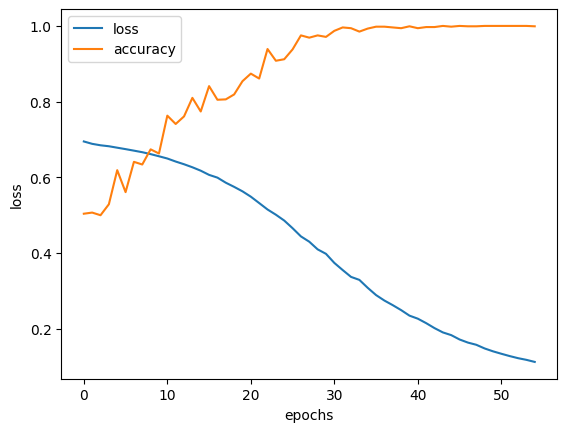

In [19]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [20]:
# 4. Evaluate the model
model_4.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1082 - accuracy: 0.9990


[0.10818794369697571, 0.9990000128746033]

In [21]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               300       
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'epochs')

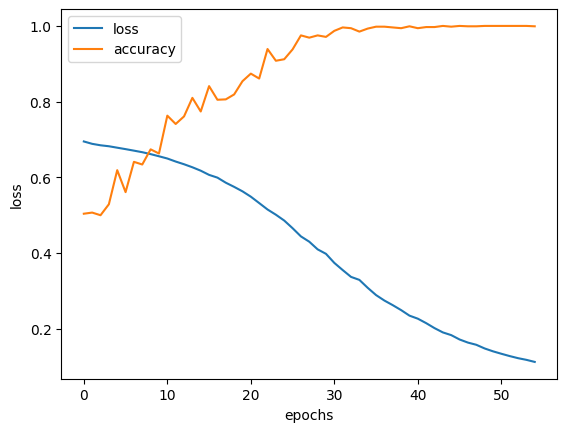

In [22]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

🔑 **Note**: Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inpsect your model's predictions.

To visulize our model's predictions, let's create a function plot_decision_boundary(), this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [23]:
import numpy as np

In [24]:
model_3.predict(X[:10])

1/1 [==============================] - 0s 92ms/step


array([[0.48375523],
       [0.57312655],
       [0.57813865],
       [0.58567816],
       [0.42963418],
       [0.5899787 ],
       [0.569114  ],
       [0.4772105 ],
       [0.4746262 ],
       [0.5900989 ]], dtype=float32)

In [25]:
model_4.predict(X[:10])

1/1 [==============================] - 0s 58ms/step


array([[0.9127883 ],
       [0.95645654],
       [0.80777204],
       [0.92168605],
       [0.07903791],
       [0.7947128 ],
       [0.90517706],
       [0.9356053 ],
       [0.8167946 ],
       [0.0118156 ]], dtype=float32)

32/32 [==============================] - 0s 2ms/step


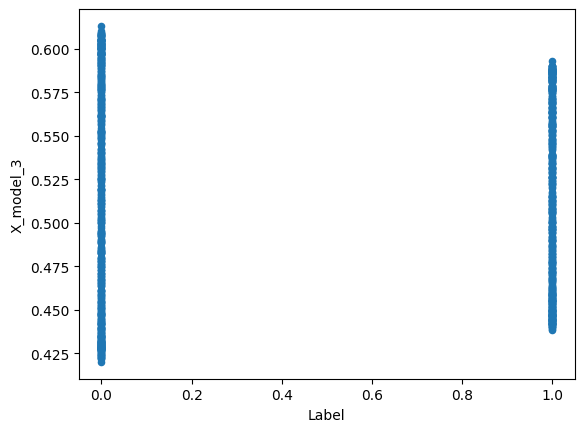

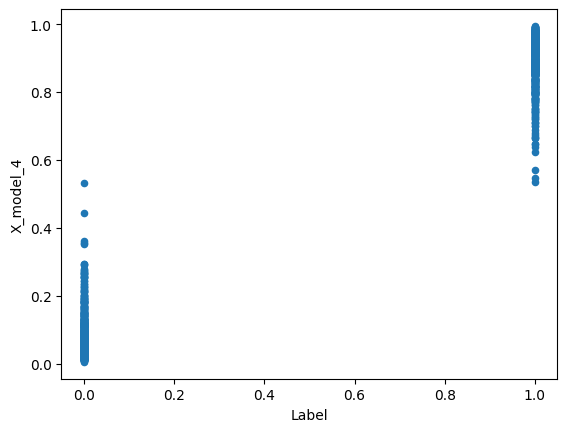

In [26]:
def plot_things_up(X=X, y=y):
  X_3 = tf.reshape(model_3.predict(X[:1000]), shape=1000)
  X_4 = tf.reshape(model_4.predict(X[:1000]), shape=1000)
  data = pd.DataFrame({
      "X_model_3": X_3,
      "X_model_4": X_4,
      "Label": y
  })
  data.plot(kind="scatter", y="X_model_3", x="Label")
  data.plot(kind="scatter", y="X_model_4", x="Label")
  plt.show()

plot_things_up()

In [27]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 1
x_min, x_max 

(-1.1595024599098636, 2.0337117525463375)

In [28]:
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 1
y_min, y_max

(-1.1677683182718437, 2.0360036756154805)

In [29]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
   1. https://cs231n.github.io/neural-networks-case-study/
   2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb 
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + .1
  
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + .1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class or binary
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


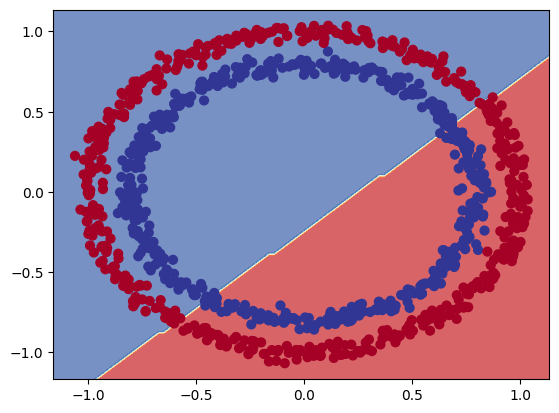

In [30]:
plot_decision_boundary(model_3, X=X, y=y)

313/313 [==============================] - 0s 1ms/step
doing binary classification


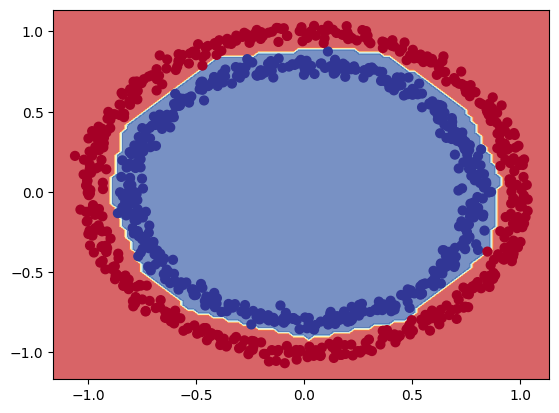

In [31]:
plot_decision_boundary(model_4, X=X, y=y)

In [32]:
# check out the predictions our model is making


In [33]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
xx, yy

(array([[-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
          2.00145706,  2.03371175],
        [-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
          2.00145706,  2.03371175],
        [-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
          2.00145706,  2.03371175],
        ...,
        [-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
          2.00145706,  2.03371175],
        [-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
          2.00145706,  2.03371175],
        [-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
          2.00145706,  2.03371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.13540699, -1.13540699, -1.13540699, ..., -1.13540699,
         -1.13540699, -1.13540699],
        [-1.10304565, -1.10304565, -1.10304565, ..., -1.10304565,
         -1.10304565, -1.10304565],
        ...,
        [ 1.97128101,  1.97128101,  1.97128101, ...,  

In [34]:
xx.shape, yy.shape

((100, 100), (100, 100))

In [35]:
len(xx)

100

In [36]:
xx.mean(), yy.mean()

(0.43710464631823714, 0.43411767867181844)

In [37]:
xx.ravel().shape, xx.shape

((10000,), (100, 100))

In [38]:
xx

array([[-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
         2.00145706,  2.03371175],
       [-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
         2.00145706,  2.03371175],
       [-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
         2.00145706,  2.03371175],
       ...,
       [-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
         2.00145706,  2.03371175],
       [-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
         2.00145706,  2.03371175],
       [-1.15950246, -1.12724777, -1.09499308, ...,  1.96920237,
         2.00145706,  2.03371175]])

In [84]:
# Set random seed
tf.random.set_seed(42)
 
# Create some regression data (<- shape issues)
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Create some regression data
#X_regression = tf.reshape(np.arange(0, 1000, 5), shape=(1,200))
#y_regression = tf.reshape(np.arange(100, 1100, 5), shape=(1,200))

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]
 
# Fit our model to the data
 
## Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100) # <- this will error in TensorFlow 2.7.0+

# Fit our model to the regression data
"""
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
            y_reg_train,
            epochs=100, verbose=0)
"""
history = model_3.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
            y_reg_train,
            epochs=100, verbose=0)


Text(0.5, 0, 'epochs')

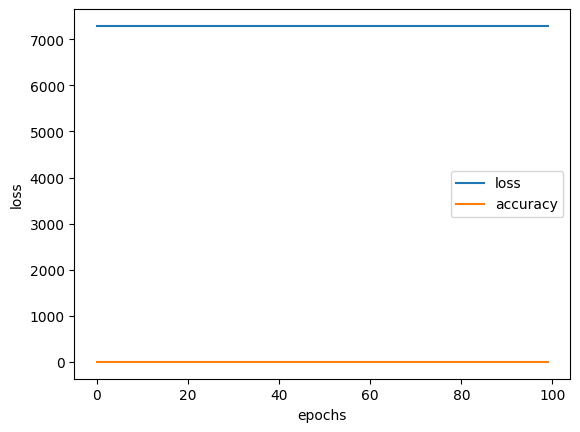

In [85]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [92]:
X_reg_test, y_reg_test

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810,
        815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875,
        880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940,
        945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([ 850,  855,  860,  865,  870,  875,  880,  885,  890,  895,  900,
         905,  910,  915,  920,  925,  930,  935,  940,  945,  950,  955,
         960,  965,  970,  975,  980,  985,  990,  995, 1000, 1005, 1010,
        1015, 1020, 1025, 1030, 1035, 1040, 1045, 1050, 1055, 1060, 1065,
        1070, 1075, 1080, 1085, 1090, 1095], dtype=int32)>)

In [95]:
model_3.evaluate(tf.expand_dims(X_reg_train, axis=-1), tf.expand_dims(y_reg_train, axis=-1))

5/5 [==============================] - 0s 6ms/step - loss: 7288.2886 - accuracy: 0.0000e+00


[7288.28857421875, 0.0]

In [101]:
tf.random.set_seed(42)

#1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

#2. Compile the model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

#3. Fit the model
history = model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, verbose=0, epochs=100)


Text(0.5, 0, 'epochs')

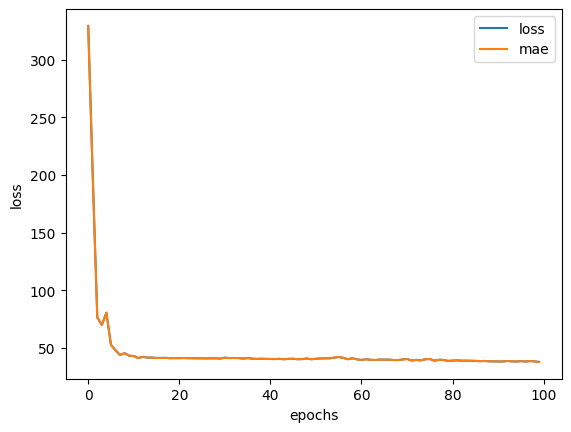

In [102]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [105]:
model_3.evaluate(tf.expand_dims(X_reg_test, axis=-1), y_reg_test)

2/2 [==============================] - 0s 9ms/step - loss: 58.7638 - mae: 58.7638


[58.76382827758789, 58.76382827758789]

In [109]:
pred_3 = model_3.predict(X_reg_test)
pred_3[:10]

2/2 [==============================] - 0s 6ms/step


array([[887.8029 ],
       [893.65875],
       [899.5142 ],
       [905.3697 ],
       [911.22516],
       [917.0809 ],
       [922.93634],
       [928.79193],
       [934.6474 ],
       [940.5029 ]], dtype=float32)

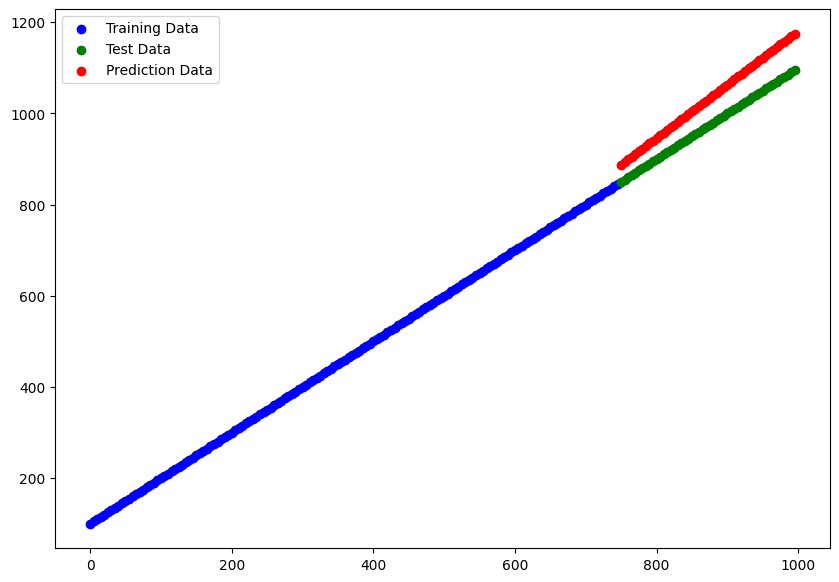

In [112]:
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, pred_3, c="r", label="Prediction Data")
plt.legend()

Text(0.5, 0, 'epochs')

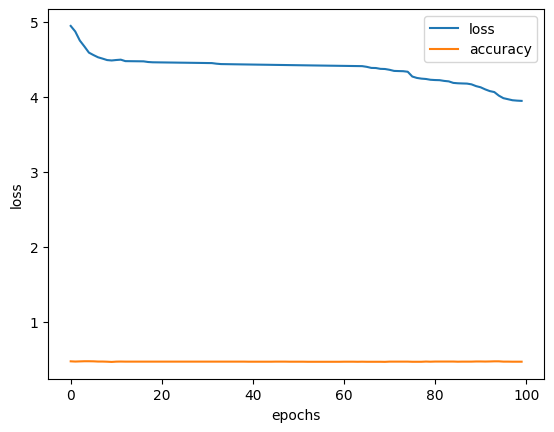

In [152]:
# create a model 5 with linear activation and lr 0.01 Adam optimizer

tf.random.set_seed(42)

#1. Create model
model_5 = tf.keras.Sequential()

#2. Add layer with linear activation
model_5.add(
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
)

#3. Compile model with Adam optimizer learning rate 0.01
model_5.compile(
    #loss=tf.keras.losses.BinaryCrossentropy(),
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

#4. Fit the model
history = model_5.fit(X, y, epochs=100, verbose=0)

#5. Plot training graph
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [149]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 4.2036 - accuracy: 0.4730


[4.203608989715576, 0.4729999899864197]

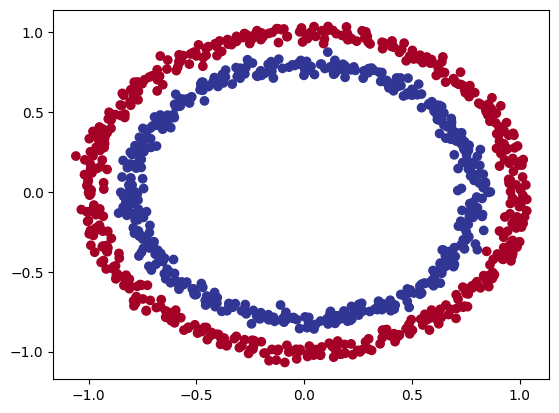

In [150]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing binary classification


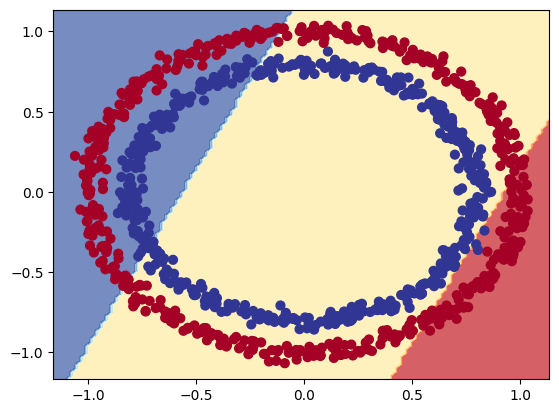

In [153]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

Text(0.5, 0, 'epochs')

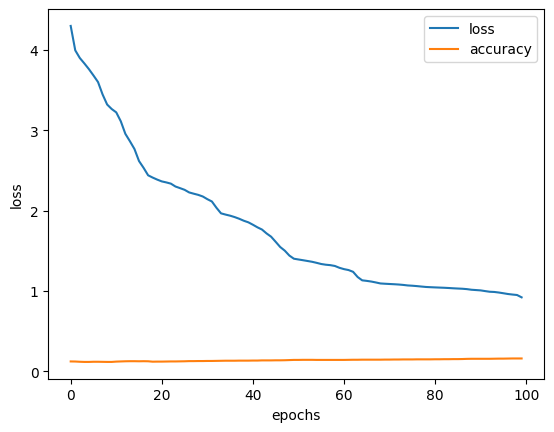

In [156]:
# create a new model with other hyper params
#1. Set random seed
tf.random.set_seed(42)

#2. Create Model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu)
])

model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history = model_6.fit(X, y, epochs=100, verbose=0)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [165]:
pd.DataFrame({"loss": history.history['loss'][:10], "accuracy": history.history['accuracy'][:10]})

,loss,accuracy
0,4.297940,0.121
1,3.993967,0.120
2,3.898574,0.117
3,3.830977,0.115
4,3.759809,0.115
5,3.681218,0.117
6,3.599161,0.117
7,3.445074,0.116
8,3.319479,0.115
9,3.263427,0.115


313/313 [==============================] - 1s 2ms/step
doing multiclass classification


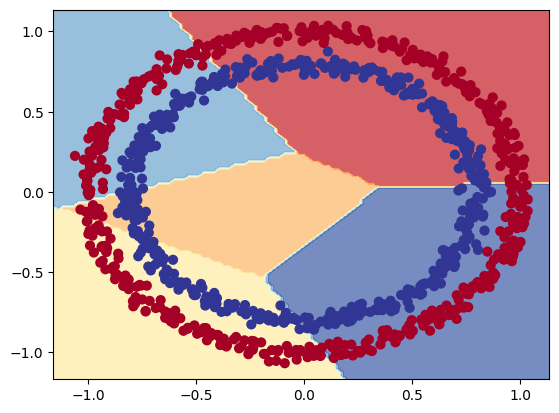

In [166]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)